# Исследование рынка общественного питания в Москве

### Цели и задачи проекта

#### Цель проекта заключается в проведении исследовательского анализа рынка общественного питания Москвы. Для этого нужно провести предобработку данных и провести исследовательский анализ данных.
#### Задачи:
- 1. Познакомиться с данными, проверить их корректность и провести предобработку.
- 2. Провести исследовательский анализ данных и ответить на вопросы:
- Какие категории заведений представлены в данных? Исследовать количество объектов общественного питания по каждой категории
- Какие административные районы Москвы присутствуют в данных? Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы
- Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Выяснить каких заведений больше — сетевых или несетевых?
- Исследовать количество посадочных мест в заведениях. Выяснить встречаются ли в данных аномальные значения или выбросы?
- Исследовать рейтинг заведений
- Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений?
- Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Выяснить к какой категории заведений они относятся?
- Изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Выяснить как удалённость от центра влияет на цены в заведениях?
- 3. Сформулировать выводы по проведённому анализу.

### Описание данных


Данные `/datasets/rest_info.csv` содержат информацию о заведениях общественного питания:

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- 0 — заведение не является сетевым;
- 1 — заведение является сетевым.
`seats` — количество посадочных мест.

Данные `/datasets/rest_price.csv` содержат информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
- «Средний счёт: 1000–1500 ₽»;
- «Цена чашки капучино: 130–220 ₽»;
- «Цена бокала пива: 400–600 ₽». и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

### Содержимое проекта


---

- Загрузка данных из датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv` и знакомство с ними.
- Предобработка данных.
- Исследовательский анализ данных.
- Итоговые выводы

## 1. Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [2]:
rest_info_df = pd.read_csv('datasets/rest_info.csv')
rest_price_df = pd.read_csv('datasets/rest_price.csv')

In [3]:
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.
После первичного анализа можно сделать следующие выводы:
- Значения в столбцах `name`, `category`, `address`, `district` и `hours` хранятся в типе данных `object` и представляют из себя текстовые данные или текстовые данные с числами — поле `hours`. Значения в столбцах `rating`, `chain` и `seats`, хранятся в типах данных `int64` и `float64` и представляют из себя целые числа или числа с плавающей точкой. Поле `chain` показывает является ли заведение сетевым и содержит значения 1 и 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся в столбцах `hours` и `seats`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.
После первичного анализа можно сделать следующие выводы:
- Значения в столбцах `price`, `avg_bill` хранятся в типе данных `object` и представляют из себя текстовые данные или текстовые данные с числами — поле `avg_bill`. Значения в столбцах `middle_avg_bill`, `middle_coffee_cup`, хранятся в типе данных `float64` и представляют из себя числа с плавающей точкой.
- Пропуски содержатся в столбцах `price` и `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`.
- Значения в столбцах соответствуют своему описанию.

Первичное знакомство показывает, что данные соответствуют описанию, используют верные типы данных и выглядят корректными.

### Подготовка единого датафрейма

In [7]:
rest_df = rest_info_df.merge(rest_price_df, how='left', on='id')

In [8]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

In [9]:
rest_df['chain'] = pd.to_numeric(rest_df['chain'], downcast='integer')

In [10]:
rest_df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [11]:
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
rest_df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме `rest_df` обнаружено следующее количество пропусков:
- В столбце `hours` - 536 пропусков — это 6% данных
- В столбце `seats` - 3611 пропусков — это 43% данных
- В столбце `price` - 5091 пропусков — это 61% данных
- В столбце `avg_bill` - 4590 пропусков — это 55% данных
- В столбце `middle_avg_bill` - 5257 пропусков — это 63% данных
- В столбце `middle_coffee_cup` - 5257 пропусков — это 94% данных
Количество пропусков достаточно большое, что бы их удалить.

Пропуски в этих столбцах могут быть вызваны:
- Отсутствием информации ввиду того, что заведение могло открыться недавно, и информации недостаточно что бы внести точную информацию в базу данных.
- Заведение работает только на вынос и нет посадочных мест внутри помещения.
- При обработке данных произошёл технический сбой.

В данном исследовании лучше оставить пропуски как есть, удалить их нельзя из-за высокого процента пропусков. Замена значений тоже некорректна, так как это не поможет в исследовании и может негативно повлиять на результаты.

In [13]:
rest_df.duplicated().sum()

0

In [14]:
rest_df['name'].str.lower()

0                     wowфли
1             четыре комнаты
2                      хазри
3       dormouse coffee shop
4                  иль марко
                ...         
8401              суши мания
8402               миславнес
8403                 самовар
8404            чайхана sabr
8405              kebab time
Name: name, Length: 8406, dtype: object

In [15]:
rest_df.duplicated(subset=['name', 'address']).sum()

0

In [16]:
def create_is_na(x):
    if x == 'ежедневно, круглосуточно':
        return True
    return False
rest_df['is_24_7'] = rest_df['hours'].apply(create_is_na)

---

### Промежуточный вывод

В результате предобработки данных были выполнены следующие действия:
- Проведена оптимизация столбца `chain` с понижением размерности
- Изучены пропуски в данных. Пропуски обнаружились в столбцах: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`. Процент пропусков в данных столбцах варьируется от 6% до 94%. Учитывая это количество, пропуски могли появится от нескольких факторов, например недавним открытием ресторанов и данных слишком мало, что бы они могли попасть в базу данных. Удалить или заменить их нельзя, так как это может негативно сказаться на результатах исследования, поэтому оставил их как есть.
- Данные были проверены на явные дубликаты и неявные дубликаты, они отсутсвуют в данных.

## 3. Исследовательский анализ данных

---

### Задача 1

Какие категории заведений представлены в данных? Исследовать количество объектов общественного питания по каждой категории.

In [17]:
rest_df['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

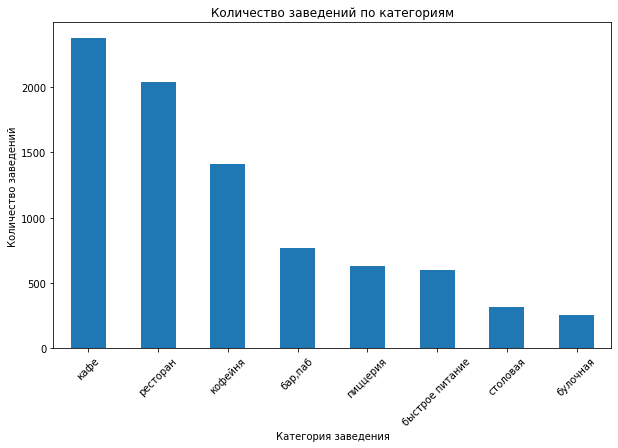

In [18]:
rest_df['category'].sort_values(ascending=False).value_counts().plot(kind='bar',
                         title='Количество заведений по категориям',
                         legend=False,
                         xlabel='Категория заведения',
                         ylabel='Количество заведений',
                         rot=45,
                         figsize=(10, 6))
plt.show()

Всего представлено 8 категорий заведений. Самое большое количество заведений соответстуют категориям: кафе - 2378 заведений, рестораны - 2043 заведений и кофейни - 1413 заведений. Скорее всего данный тип заведений пользуется большим спросом среди клиентов. Самое малое количество заведений соответстуют категориям: быстрое питание - 603 заведений, столовые - 315 заведений и булочные - 256 заведений. 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [19]:
rest_df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

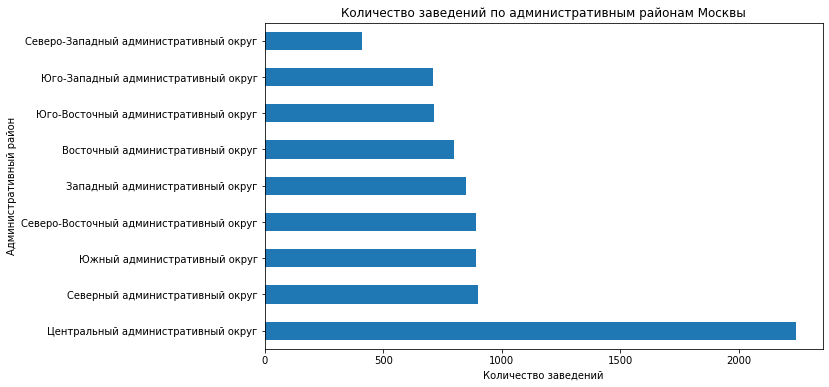

In [20]:
plt.figure(figsize=(10, 6))
rest_df['district'].sort_values(ascending=False).value_counts().plot(kind='barh')
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
plt.title('Количество заведений по административным районам Москвы')
plt.show()

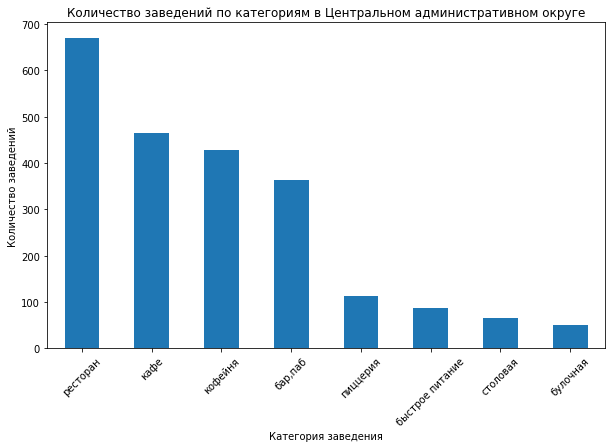

In [21]:
cao_df = rest_df[rest_df['district'] == 'Центральный административный округ']
category_counts_cao = cao_df['category'].sort_values(ascending=False).value_counts()
category_counts_cao.plot(kind='bar',
                    title='Количество заведений по категориям в Центральном административном округе',
                         legend=False,
                         xlabel='Категория заведения',
                         ylabel='Количество заведений',
                         rot=45,
                         figsize=(10, 6))
plt.show()

Самое большое количество заведений находится в Центральном административном округе - больше 2000, самое маленькое в Северо-Западном административном округе. В этом есть логика, так как Центральный Административный Округ находится в центре Москвы, где большая проходимость. Преобладающим типом в ЦАО составляют рестораны, кафе и кофейни, меньше всего сетей быстрого питания, столовых и булочных.

---

### Задача 3

Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Выяснить каких заведений больше — сетевых или несетевых?

In [22]:
rest_df['chain'].value_counts()

0    5201
1    3205
Name: chain, dtype: int64

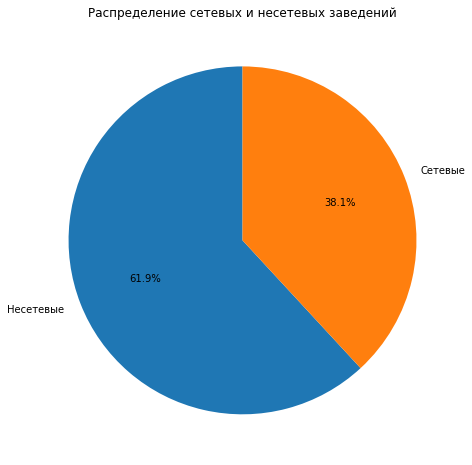

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(rest_df['chain'].value_counts(), labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение сетевых и несетевых заведений')
plt.show()

In [24]:
rest_df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

chain,0,1
category,,
"бар,паб",596,169
булочная,99,157
быстрое питание,371,232
кафе,1599,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,730
столовая,227,88


In [25]:
df_unstack_rest = rest_df[rest_df['chain'] == 1].groupby('category').size() / rest_df.groupby('category').size()
df_unstack_rest.round(2)

category
бар,паб            0.22
булочная           0.61
быстрое питание    0.38
кафе               0.33
кофейня            0.51
пиццерия           0.52
ресторан           0.36
столовая           0.28
dtype: float64

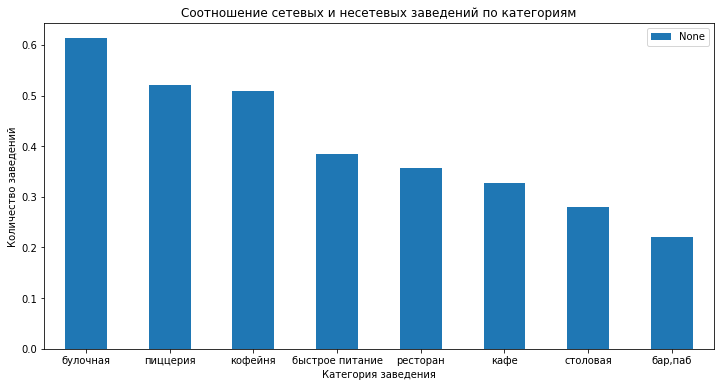

In [26]:
df_unstack_rest.sort_values(ascending=False).plot(kind='bar',
                legend = True,
                title = 'Соотношение сетевых и несетевых заведений по категориям',
                xlabel = 'Категория заведения',
                ylabel = 'Количество заведений',
                rot=0,
                figsize=(12, 6))
plt.show()

- Больше несетевых заведений - 5201, что составляет 61,9% от общего количества, а сетевых заведений меньше - 3205, что составляет 38,1% от общего количества.
- Чаще всего сетевыми являются: булочные - доля сетевых заведений внутри этой категории составляет 61%, пиццерии - доля сетевых заведений внутри этой категории составляет 52% и кофейни - доля сетевых заведений внутри этой категории составляет 51%. Реже: столовые - доля сетевых заведений внутри этой категории составляет 28% и бары,пабы - доля сетевых заведений внутри этой категории составляет 22%.

---

### Задача 4

Исследовать количество посадочных мест в заведениях. Выяснить встречаются ли в данных аномальные значения или выбросы?


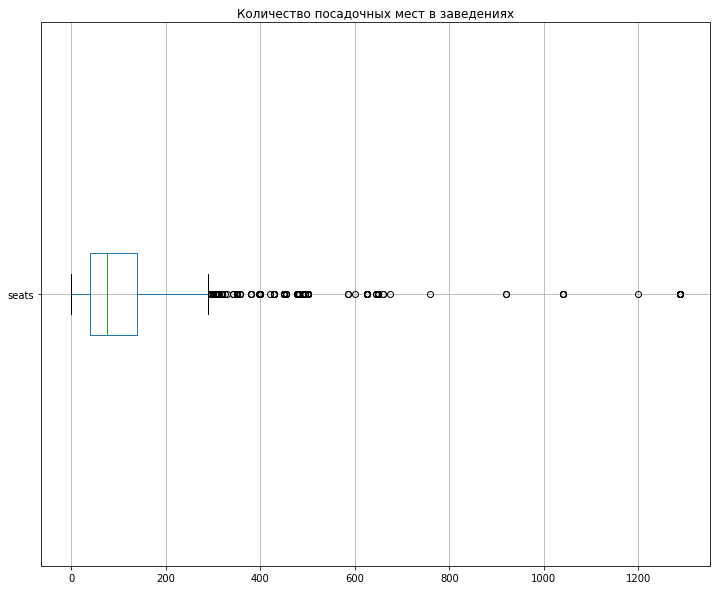

In [27]:
plt.figure(figsize=(12, 10))
rest_df.boxplot(column='seats',
                vert=False)
plt.title('Количество посадочных мест в заведениях')
plt.show()

Распределение данных выглядит нормальным, однако характеризуется широким разбросом и хвостом в правой части гистограммы. Такие высокие значения можно отнести к аномальным значениям. Близкие значения к основному распределению нормальны, так как помещения для посадки гостей могут быть большие и принимать более 300 гостей. Значения, которые которые начинаются от 500 могут быть связаны с ошибкой в данных (например ошиблись и поставили лишний 0), их небольшое количество.

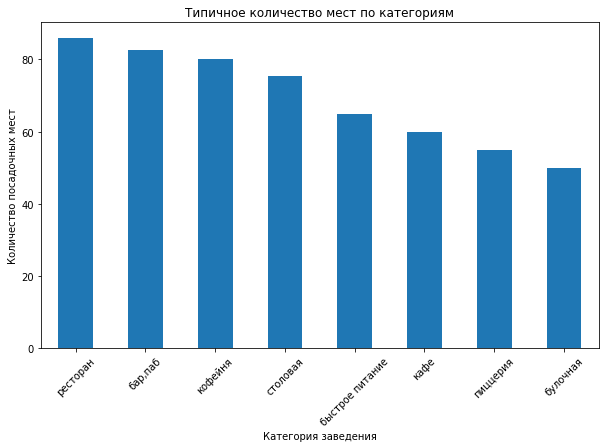

In [28]:
rest_df.groupby('category')['seats'].median().sort_values(ascending=False).plot(kind='bar',
                         title='Типичное количество мест по категориям',
                         legend=False,
                         xlabel='Категория заведения',
                         ylabel='Количество посадочных мест',
                         rot=45,
                         figsize=(10, 6))
plt.show()

Среднее количество посадочных мест у разных категорий заведений начинается варьируется от 50 до 85 посадочных мест. Самое большое типичное количество мест у заведений из категорий рестораны, бары,пабы и кофейни.

---

### Задача 5

Исследовать рейтинг заведений.

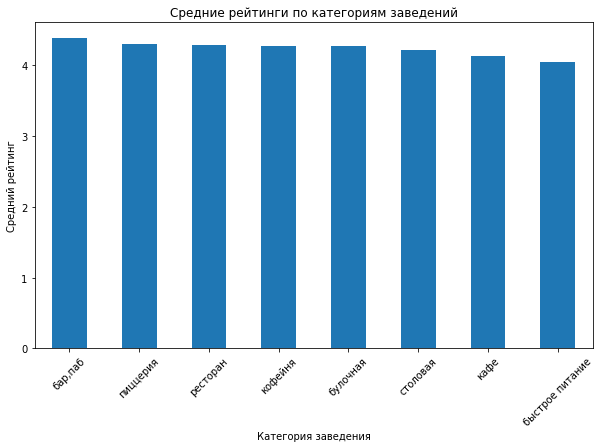

In [29]:
rest_df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                                  title='Средние рейтинги по категориям заведений',
                                                  legend=False,
                                                  xlabel='Категория заведения',
                                                  ylabel='Средний рейтинг',
                                                  rot=45,
                                                  figsize=(10, 6))
plt.show()
                                                  

Усреднённый рейтинг для разных типов заведений особо не отличается и колеблется в районе 4.

---

### Задача 6

Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений?

In [30]:
correlation_matrix = phik_matrix(rest_df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating', 'middle_avg_bill']])
data_heatmap_rest = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
##Убрана строка с индексом 'rating', которая хранит коррелляцию rating с самим собой, что бы дале выбрать самую сильную связь
data_heatmap_rest

interval columns not set, guessing: ['chain', 'seats', 'rating', 'middle_avg_bill']


,rating
price,0.220295
middle_avg_bill,0.211868
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


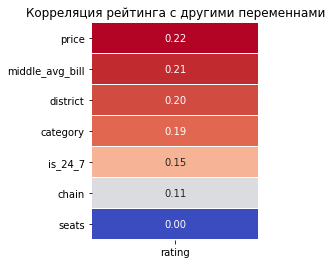

In [31]:
plt.figure(figsize=(3, 4))
sns.heatmap(data_heatmap_rest,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False)
plt.title('Корреляция рейтинга с другими переменнами')
plt.show()

In [32]:
data_heatmap_rest.max()

rating    0.220295
dtype: float64

Наибольшая корреляция рейтинга наблюдается с категорией цен в заведении - 0.22, c числом с оценкой среднего чека - 0.21, административном районе, в котором находится заведение - 0.20. Для остальных признаков коэффициент коррекляциии снижается с 0.15 до 0.

---

### Задача 7

Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Выяснить к какой категории заведений они относятся?

In [33]:
chain_counts_rest = rest_df[rest_df['chain'] == 1].groupby(['name', 'category']).size().reset_index(name='count')
top_15_chains_rest = chain_counts_rest.sort_values(by='count', ascending=False).head(15)
top_15_chains_rest

,name,category,count
1142,Шоколадница,кофейня,119
504,Домино'с Пицца,пиццерия,76
497,Додо Пицца,пиццерия,74
206,One Price Coffee,кофейня,71
1158,Яндекс Лавка,ресторан,69
73,Cofix,кофейня,65
242,Prime,ресторан,49
558,КОФЕПОРТ,кофейня,42
644,Кулинарная лавка братьев Караваевых,кафе,39
978,Теремок,ресторан,36


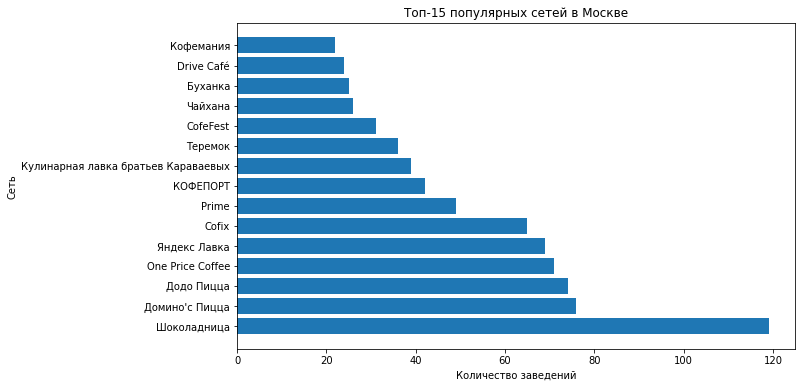

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(top_15_chains_rest['name'], top_15_chains_rest['count'].sort_values(ascending=False))
plt.xlabel('Количество заведений')
plt.ylabel('Сеть')
plt.title('Топ-15 популярных сетей в Москве')
plt.show()

In [35]:
average_ratings = rest_df[rest_df['name'].isin(top_15_chains_rest['name'])].groupby('name')['rating'].mean().reset_index(name='average_rating')
average_ratings_rest = pd.merge(top_15_chains_rest, average_ratings, on='name')
average_ratings_rest

,name,category,count,average_rating
0,Шоколадница,кофейня,119,4.177500
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286486
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.116000
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.123684


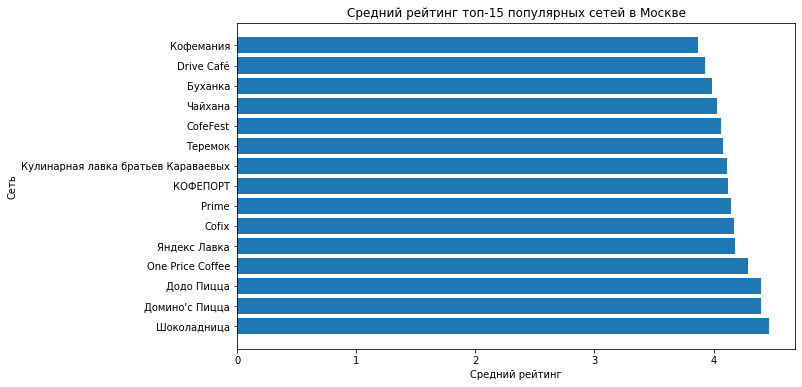

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(average_ratings_rest['name'], average_ratings_rest['average_rating'].sort_values(ascending=False))
plt.xlabel('Средний рейтинг')
plt.ylabel('Сеть')
plt.title('Средний рейтинг топ-15 популярных сетей в Москве')
plt.show()

Самое большое количество заведений имеют следующие сети: Шоколадница - 119 заведений, Домино'с Пицца - 76 заведений и Додо Пицца - 74 заведений. Средний рейтинг у заведений из Топ-15 варьируется от 3.87 до 4.46. В топ попали следующие категории заведений: кофейня, пиццерия, ресторан, кафе, булочная.  Стоит обратить внимание, что в топ попал сервис Яндекс.Лавка, который занимается доставкой готовых блюд и продуктов. Категория у данного сервиса стоит ресторан, возможно стоит добавить в столбец ещё одно значение, куда будут входить дарк китчены, сервисы доставки и т.д., что бы в базе данных был более корректный список категорий.

---

### Задача 8

Изучить вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Выяснить как удалённость от центра влияет на цены в заведениях?


In [37]:
rest_avg_bill = rest_df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)
rest_avg_bill

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

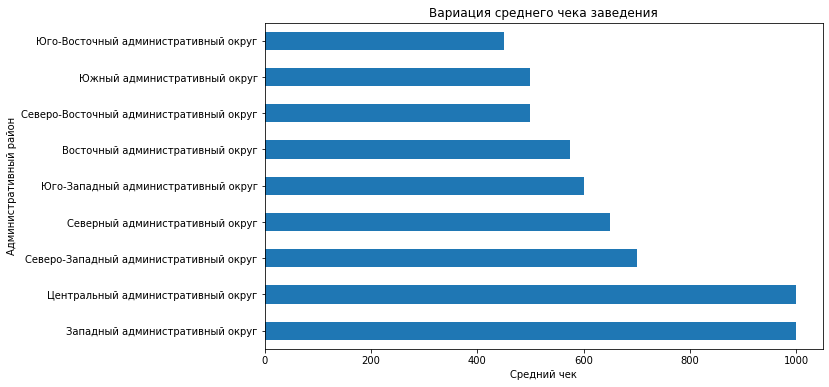

In [38]:
plt.figure(figsize=(10, 6))
rest_avg_bill.plot(kind='barh')
plt.xlabel('Средний чек')
plt.ylabel('Административный район')
plt.title('Вариация среднего чека заведения')
plt.show()

Центральный и Западный округи имеют наибольший средний чек - около 1000 рублей. Юго-Восточный округ, имеет наименьший средний чек - 450 рублей. Округи, которые находятся дальше от центра имеют в среднем средний чек на 1,5-2 раза ниже, чем округи, которые находятся ближе к центру

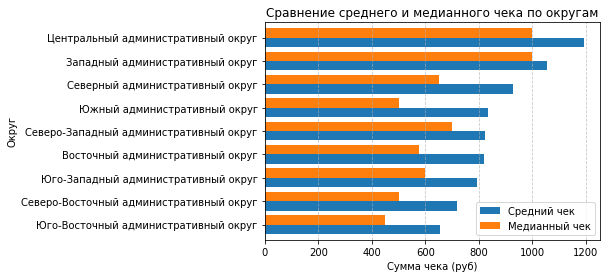

<Figure size 864x864 with 0 Axes>

In [40]:
# Создаем сгруппированный df по округам, считаем средний и медианный чек
grouped_df = rest_df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values('mean')

# Строим столбчатую диаграмму с группировкой
grouped_df.plot(kind='barh',
               rot=0,
               title='Сравнение среднего и медианного чека по округам',
               width=0.8,
               color=['#1f77b4', '#ff7f0e'])

# Настраиваем оформление графика
plt.xlabel('Сумма чека (руб)')
plt.ylabel('Округ')
plt.legend(['Средний чек', 'Медианный чек'], frameon=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.figure(figsize=(12, 12))
plt.tight_layout()
plt.show()

---

### Промежуточный вывод

Исследовательский анализ показал что:

- Всего представлено 8 категорий заведений. Самое большое количество заведений соответстуют категориям: кафе, рестораны и кофейни. Скорее всего данный тип заведений пользуется большим спросом среди клиентов. Самое малое количество заведений соответстуют категориям: быстрое питание, столовые и булочные.
- Самое большое количество заведений находится в Центральном административном округе - больше 2000, самое маленькое в Северо-Западном административном округе. В этом есть логика, так как Центральный Административный Округ находится в центре Москвы, где большая проходимость. Преобладающим типом в ЦАО составляют рестораны, кафе и кофейни, меньше всего сетей быстрого питания, столовых и булочных.
- Больше несетевых заведений - 5201, что составляет 61,9% от общего количества, а сетевых заведений меньше - 3205, что составляет 38,1% от общего количества. Чаще всего сетевыми являются: булочные - доля сетевых заведений внутри этой категории составляет 61%, пиццерии - доля сетевых заведений внутри этой категории составляет 52% и кофейни - доля сетевых заведений внутри этой категории составляет 51%. Реже: столовые - доля сетевых заведений внутри этой категории составляет 28% и бары,пабы - доля сетевых заведений внутри этой категории составляет 22%.
- Среднее количество посадочных мест у разных категорий заведений начинается варьируется от 50 до 85 посадочных мест. Самое большое типичное количество мест у заведений из категорий рестораны, бары,пабы и кофейни.
- Усреднённый рейтинг для разных типов заведений особо не отличается и колеблется в районе 4.
- Наибольшая корреляция рейтинга наблюдается с категорией цен в заведении - 0.22, c числом с оценкой среднего чека - 0.21, административном районе, в котором находится заведение - 0.20. Для остальных признаков коэффициент коррекляциии снижается с 0.15 до 0.
- Самое большое количество заведений имеют следующие сети: Шоколадница, Домино'с Пицца и Додо Пицца. Средний рейтинг у заведений из Топ-15 варьируется от 3.87 до 4.46. В топ попали следующие категории заведений: кофейня, пиццерия, ресторан, кафе, булочная. Стоит обратить внимание, что в топ попал сервис Яндекс.Лавка, который занимается доставкой готовых блюд и продуктов. Категория у данного сервиса стоит ресторан, возможно стоит добавить в столбец ещё одно значение, куда будут входить дарк китчены, сервисы доставки и т.д., что бы в базе данных был более корректный список категорий.
- Центральный и Западный округи имеют наибольший средний чек - около 1000 рублей. Юго-Восточный округ, имеет наименьший средний чек - 450 рублей. Округи, которые находятся дальше от центра имеют в среднем средний чек на 1,5-2 раза ниже, чем округи, которые находятся ближе к центру

## 4. Итоговый вывод и рекомендации

Цель данного проекта заключалась в проведении исследовательского анализа рынка общественного питания Москвы. Для этого нужно было провести предобработку данных и провести исследовательский анализ данных.

В ходе предобработки была проведена оптимизация столбца `chain` с понижением размерности. Изучены пропуски в данных, процент пропусков которых варьируется от 6% до 94%. Они были оставлены как есть так как это может негативно сказаться на результатах исследования. Данные были проверены на явные дубликаты и неявные дубликаты. Явные и неявные дубликаты в данных отсуствуют. Проверка неявных дубликатов была осуществлена в столбцах `name` и `address`.

В ходе исследования проанализированы данные 8406 заведений в городе Москва. Данные включали в себя основную информацию о заведениях: название заведения, адрес, рейтинг, средний чек и т.д. Акцент исследований был на том, что бы с помощью визуализаций ответить на вопросы.

- Всего в данных представлено 8 категорий заведений. Самое большое количество заведений соответстуют категориям: кафе, рестораны и кофейни. Скорее всего данный тип заведений пользуется большим спросом среди клиентов. Самое малое количество заведений соответстуют категориям: быстрое питание, столовые и булочные.
- Самое большое количество заведений находится в Центральном административном округе - больше 2000, самое маленькое в Северо-Западном административном округе. Это связано с тем, что Центральный Административный Округ находится в центре Москвы, где большая проходимость. Преобладающим типом в ЦАО составляют рестораны, кафе и кофейни, меньше всего сетей быстрого питания, столовых и булочных.
- Больше несетевых заведений - 5201, что составляет 61,9% от общего количества, а сетевых заведений меньше - 3205, что составляет 38,1% от общего количества. Чаще всего сетевыми являются булочные, пиццерии и кофейни. Реже столовые и бары,пабы.
- Среднее количество посадочных мест у разных категорий заведений начинается варьируется от 50 до 85 посадочных мест. Самое большое типичное количество мест у заведений из категорий рестораны, бары,пабы и кофейни. Распределение данных выглядит нормальным, однако характеризуется широким разбросом. Аномальные значения в данных встречаются. Значения посадочных мест, которые которые начинаются от 500 могут быть связаны с ошибкой в данных (например ошиблись и поставили лишний 0), их небольшое количество.
- Усреднённый рейтинг для разных типов заведений особо не отличается и колеблется в районе 4.
- Наибольшая корреляция рейтинга наблюдается с категорией цен в заведении - 0.22, c числом с оценкой среднего чека - 0.21, административном районе, в котором находится заведение - 0.20. Для остальных признаков коэффициент коррекляциии снижается с 0.15 до 0.
- Самое большое количество заведений имеют следующие сети: Шоколадница, Домино'с Пицца и Додо Пицца. Средний рейтинг у заведений из Топ-15 варьируется от 3.87 до 4.46. В топ попали следующие категории заведений: кофейня, пиццерия, ресторан, кафе, булочная. В топ попал сервис Яндекс.Лавка, который занимается доставкой готовых блюд и продуктов. Категория у данного сервиса стоит ресторан, возможно стоит добавить в столбец ещё одно значение, куда будут входить дарк китчены, сервисы доставки и т.д., что бы в базе данных был более корректный список категорий.
- Центральный и Западный округи имеют наибольший средний чек - около 1000 рублей. Юго-Восточный округ, имеет наименьший средний чек - 450 рублей. Округи, которые находятся дальше от центра имеют в среднем средний чек на 1,5-2 раза ниже, чем округи, которые находятся ближе к центру

В качестве рекомендаций стоит обратить внимание не только на заведения с категорией кафе, рестораны и кофейни, но и на заведения с категорией например булочные, так как их меньше, следовательно конкуренция меньше. Рейтинги у разных категорий судя по результатам особо не отличаются. Можно разработать меню, которое будет соответствовать ожиданиям и желанием клиентов, провести акции, например купи кофе, булочка бесплатно. Что бы выяснить это нужно провести опросы. В последнее время клиенты хотят больше простоты чем изысков, и может выясниться, что их устроит меню с маленьким количеством позиций, но при этом блюда в меню будут высокого качества. Булочная это не обязательно про булочки, но и про пирожки, мягкие вафли и т.д. В позитивные моменты можно отнести маленькие заведения требуют меньшее количество вложенных средств. Следовательно если всё сделать граммотно, то можно будет открыть ещё несколько точек и располагаться не только в одном районе, но и сосредоточится по большему количеству районов Москвы.